In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.patches as patches

In [38]:
p = 19747823.9 #population

i = 0.03*p  #infected
s = p-i #susceptible
r = 0.1 #recovered/removed
e=0.2*p #exposed
d= 0    #dead

alpha = 1.3  #transmission parameter
beta = 0.2 #recovery parameter
gamma = 0.03 #mortality parameter

reg = 1 #regular infected parameter

#Defence Strategy Parameters
m = 0.74 #masking
sd = 0.53 #social distancing
ct = 0.66 #contact tracing

#Attacking Strategy Parameters
ri = 1.2 #reduced incubation
e = 1.35 #evolution of the disease
rz = 1.5 #creating red zones

#Cost Function Parameters for Defender
CMM = 0.7
CM = 0.5
CSSD = 0.5
CSD = 0.6
CCT = 0.4

#Cost Function Parameters for Attacker
CRI = 0.6
CE = 0.5
CRZ = 0.7

initialTime = 0
deltaTime = 0.03 #dividing time into small parts
maxTime = 500 #maximum time over which the model is observed
maxTimeInitial = maxTime

In [39]:
#alpha is the transmission rate
#beta is the recovery rate
#gamma is the mortality rate

def susceptible(S, I, alpha):    
    return -1*((alpha*S*I)/p)

def exposed(S, I, E, alpha, beta): 
    return ((alpha*S*I)/p)-beta*E

def infected(I, S, alpha, beta, gamma):
    return (((alpha*S)/p)-beta)*I - gamma*I

def recovered(I, beta):
    return beta*I

def dead(I, gamma):
    return gamma*I

def infect_after_strategy(I, S, strategy_factor, alpha, beta, gamma): 
    return strategy_factor*((((alpha*S)/p)-beta)*I - gamma*I)

def masking_cost(S, I, alpha):
    return alpha*CMM*I + (1-alpha)*CM*S
                          
def socialdistancing_cost(S, I, alpha):
    return alpha*CSSD*I + (1-alpha)*CSD*S
                          
def contacttracing_cost(I, alpha):
    return alpha*CCT*I
    
def reducedincubation_cost(S, R, alpha, beta):
    return (alpha*S + beta*R)*CRI
                          
def evolution_cost(S, R, alpha, beta):
    return (alpha*S + beta*R)*CE
                          
def redzones_cost(S, R, alpha, beta):
    return (alpha*S + beta*R)*CRZ
                          
                          

In [40]:
def Data_generation(transRate, recovRate, mortalRate, str_fact, maxT): # defining a data generating function for generating variable s, e, i, r, d values
    global alpha, beta, strategy_factor, maxTimeInitial #defining the variables for generating data
    
    # initializing the variables
    
    alpha = transRate
    beta = recovRate
    gamma = mortalRate
    strategy_factor = str_fact
    
    maxTimeInitial = maxT


    sInitial = s
    iInitial = i
    rInitial = r
    eInitial = e
    dInitial = d
    
    
    time = np.arange(maxTimeInitial+1) # arange function helps us to create equally spaced values from (0,10000) for creating 10000 timesteps
    sVals = np.zeros(maxTimeInitial+1) # creating empty array for storing new S values
    iVals = np.zeros(maxTimeInitial+1) # creating empty array for storing new I values
    rVals = np.zeros(maxTimeInitial+1) # creating empty array for storing new R values
    eVals = np.zeros(maxTimeInitial+1) # creating empty array for storing new E values
    dVals = np.zeros(maxTimeInitial+1) # creating empty array for storing new D values

    

    for t in range(initialTime, maxTimeInitial+1): #generating new values with change of time t
        sVals[t] = sInitial
        iVals[t] = iInitial
        rVals[t] = rInitial
        eVals[t] = eInitial
        dVals[t] = dInitial
        
        newDeltas = (susceptible(sInitial, iInitial, alpha = alpha), infect_after_strategy(iInitial, sInitial, strategy_factor = strategy_factor, alpha = alpha, beta = beta, gamma = gamma), 
                    recovered(iInitial, beta=beta), exposed(sInitial, iInitial, eInitial, alpha=alpha, beta=beta),
                     dead(iInitial, gamma = gamma))
        
        sInitial += newDeltas[0]*deltaTime # updating S with new values at each time step
        iInitial += newDeltas[1]*deltaTime # updating I with new values at each time step
        rInitial += newDeltas[2]*deltaTime # updating R with new values at each time step
        eInitial += newDeltas[3]*deltaTime # updating E with new values at each time step
        dInitial += newDeltas[4]*deltaTime # updating D with new values at each time step
        
      
        if sInitial < 0 or iInitial < 0 or rInitial < 0 or eInitial <0 or dInitial < 0 :
            break 

            
    return (time, sVals, eVals, iVals, rVals, dVals)


In [64]:
t, _, _, i_m, _, _ = Data_generation(alpha, beta, gamma, m, maxTimeInitial)
_, _, _, i_sd, _, _ = Data_generation(alpha, beta, gamma, sd, maxTimeInitial)
_, _, _, i_ct, _, _ = Data_generation(alpha, beta, gamma, ct, maxTimeInitial)
_, _, _, i_reg, _, _ = Data_generation(alpha, beta, gamma, reg, maxTimeInitial)

In [102]:
du = []
for i in range(0,501):
    if(i <= 400):
        du.append(i_sd[i])
    else:
        du.append(i_m[i])
        

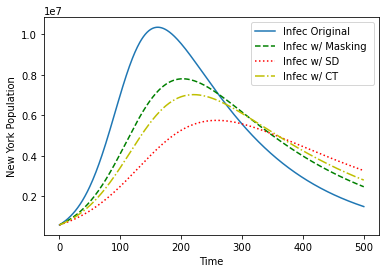

In [107]:
plt.figure()
plt.plot(t, i_reg,'-', label='Infec Original')
plt.plot(t, i_m, 'g--', label='Infec w/ Masking ')
plt.plot(t, i_sd, 'r:', label='Infec w/ SD')
plt.plot(t, i_ct, 'y-.', label='Infec w/ CT')


plt.xlabel('Time')
plt.ylabel('New York Population')
plt.legend()

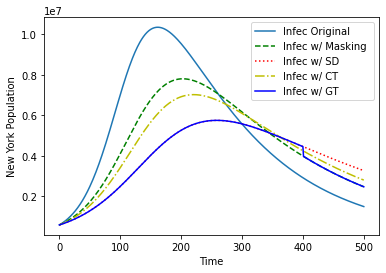

In [120]:
plt.figure()
plt.plot(t, i_reg,'-', label='Infec Original')
plt.plot(t, i_m, 'g--', label='Infec w/ Masking ')
plt.plot(t, i_sd, 'r:', label='Infec w/ SD')
plt.plot(t, i_ct, 'y-.', label='Infec w/ CT')
plt.plot(t, du, 'b', label='Infec w/ GT')


plt.xlabel('Time')
plt.ylabel('New York Population')
plt.legend()
plt.savefig("gtoutput.pdf", bbox_inches = 'tight')

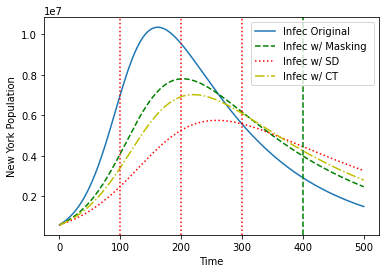

In [114]:
plt.figure()
plt.plot(t, i_reg,'-', label='Infec Original')
plt.plot(t, i_m, 'g--', label='Infec w/ Masking ')
plt.plot(t, i_sd, 'r:', label='Infec w/ SD')
plt.plot(t, i_ct, 'y-.', label='Infec w/ CT')
plt.axvline(100, color='r', linestyle = ':')
plt.axvline(200, color='r', linestyle = ':')
plt.axvline(300, color='r', linestyle = ':')
plt.axvline(400, color='g', linestyle = '--')

plt.savefig("gt_hori.pdf", bbox_inches = 'tight')
plt.xlabel('Time')
plt.ylabel('New York Population')
plt.legend()

In [ ]:
plt.axvline(100, color='r', linestyle = ':')


In [70]:
def best_defender_strategy():
    
    
    time = [100, 200, 300, 400, 500]
    for ti in time:
        
        if (i_m[ti] < i_sd[ti]) and (i_m[ti] < i_ct[ti]) :
            print("Masking is best defensive strategy at: ", +ti)
            
        
        elif (i_sd[ti] < i_m[ti]) and (i_sd[ti] < i_ct[ti]) :
            print("Social Distancing is best defensive strategy at : ", +ti)
            
        else:
            print("Contact Tracing is best defensive strategy at :", +ti)
         

In [71]:
best_defender_strategy()

Social Distancing is best defensive strategy at :  100
Social Distancing is best defensive strategy at :  200
Social Distancing is best defensive strategy at :  300
Masking is best defensive strategy at:  400
Masking is best defensive strategy at:  500
